In [1]:
import numpy as np

### Add website visitor data as a numpy array

In [2]:
# MAKE A NUMPY ARRAY TO STORE WEBSITE VISITOR DATA
visitors = np.array([250, 300, 285, 270, 310, 330, 290, 340, 360, 325,
                     300, 310, 275, 295, 260, 280, 300, 310, 325, 335,
                     340, 360, 350, 320, 310, 305, 290, 315, 330, 340])
print("visitor data: ", visitors)

visitor data:  [250 300 285 270 310 330 290 340 360 325 300 310 275 295 260 280 300 310
 325 335 340 360 350 320 310 305 290 315 330 340]


In [3]:
print("Array shape: ", visitors.shape)
print("Data Type:", visitors.dtype)
print("Array Size (elements):", visitors.size)

Array shape:  (30,)
Data Type: int64
Array Size (elements): 30


### simple operations on the visitors data

In [4]:
total_visitors = np.sum(visitors)

print(f"Total visitors is {total_visitors}")

Total visitors is 9310


In [5]:
avg_visitors = np.mean(visitors)

print(f"average number of visitors per day is {round(avg_visitors,0)}")

average number of visitors per day is 310.0


In [6]:
max_visitors = np.max(visitors)
min_visitors = np.min(visitors)
print("Max Visitors in a Day:", max_visitors)
print("Min Visitors in a Day:", min_visitors)


Max Visitors in a Day: 360
Min Visitors in a Day: 250


In [7]:
daily_diff = np.diff(visitors)
print(f"day over day difference is {daily_diff}")

day over day difference is [ 50 -15 -15  40  20 -40  50  20 -35 -25  10 -35  20 -35  20  20  10  15
  10   5  20 -10 -30 -10  -5 -15  25  15  10]


In [8]:
daily_diff.size

29

In [9]:
import matplotlib.pyplot as plt

#### Daily visitor trend

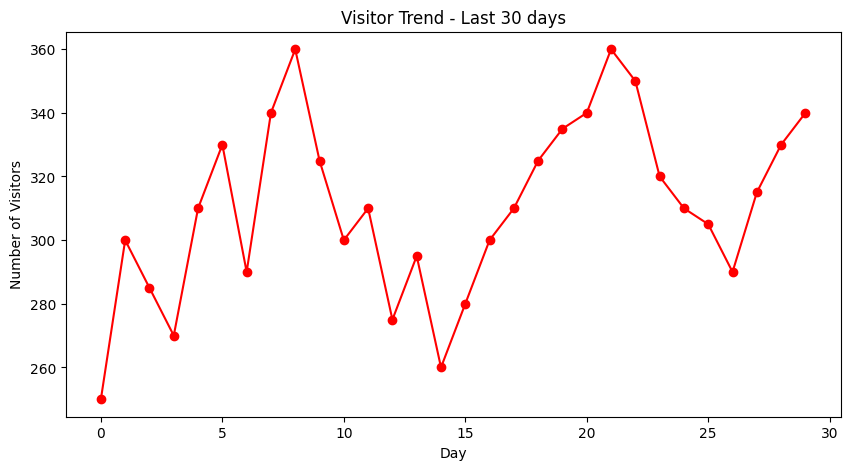

In [10]:
plt.figure(figsize=(10, 5))
plt.plot(visitors, marker='o', linestyle='-', color='r', label="Visitors")
plt.title("Visitor Trend - Last 30 days")
plt.xlabel("Day")
plt.ylabel("Number of Visitors")
#plt.legend()
plt.show()

#### Visitor Variance Over Time

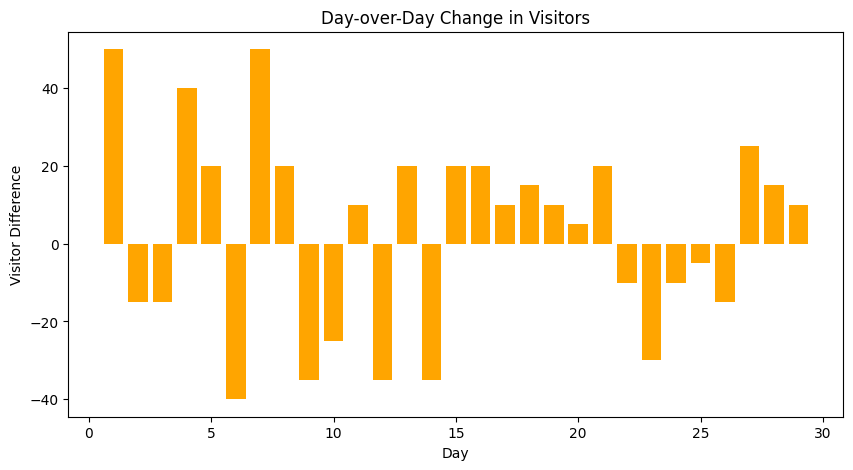

In [11]:
plt.figure(figsize=(10, 5))
plt.bar(range(1, len(daily_diff) +1), daily_diff, color='orange')
plt.title("Day-over-Day Change in Visitors")
plt.xlabel("Day")
plt.ylabel("Visitor Difference")
plt.show()

#### Visitor Distribution as a histogram

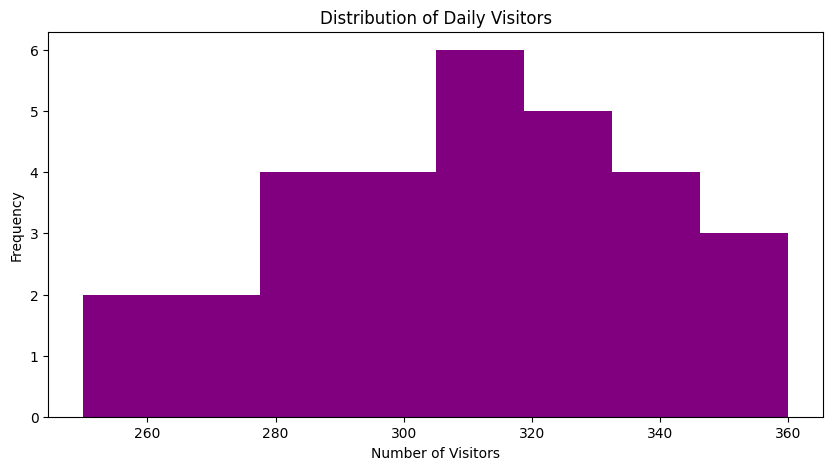

In [12]:
plt.figure(figsize=(10, 5))
plt.hist(visitors, bins=8, color='purple')
plt.title("Distribution of Daily Visitors")
plt.xlabel("Number of Visitors")
plt.ylabel("Frequency")
plt.show()

#### Combine 3 graphs into one visual

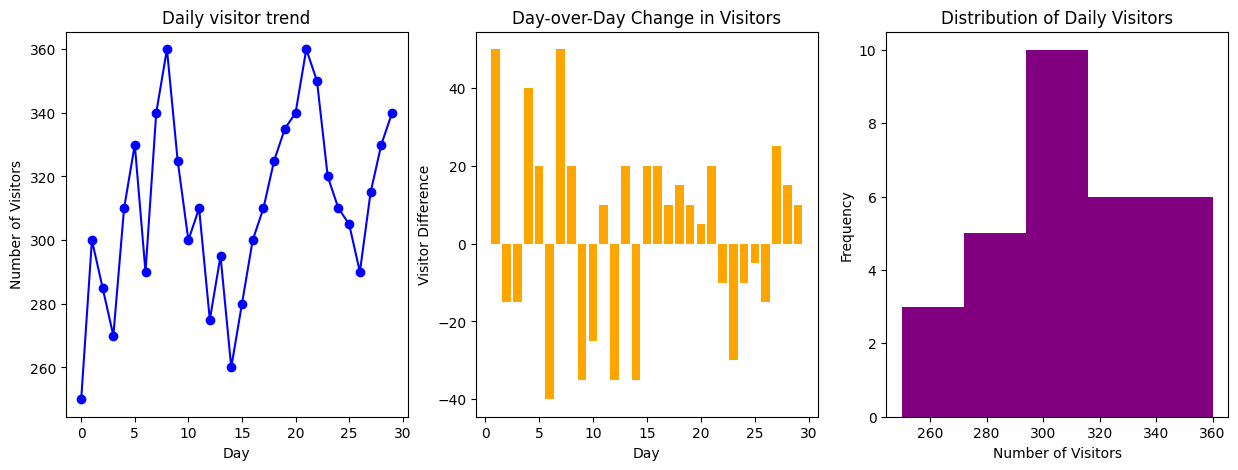

In [13]:
figure, axis = plt.subplots(1,3, figsize=(15,5))

axis[0].plot(visitors, marker='o', linestyle='-', color='b', label="Visitors")
axis[0].set_title("Daily visitor trend")
axis[0].set_xlabel("Day")
axis[0].set_ylabel("Number of Visitors")

axis[1].bar(range(1, len(daily_diff) + 1), daily_diff, color='orange')
axis[1].set_title("Day-over-Day Change in Visitors")
axis[1].set_xlabel("Day")
axis[1].set_ylabel("Visitor Difference")

axis[2].hist(visitors, bins=5, color='purple')
axis[2].set_title("Distribution of Daily Visitors")
axis[2].set_xlabel("Number of Visitors")
axis[2].set_ylabel("Frequency")

plt.show()

### Conditional Selection (filtering) with NumPy

In [14]:
visitors

array([250, 300, 285, 270, 310, 330, 290, 340, 360, 325, 300, 310, 275,
       295, 260, 280, 300, 310, 325, 335, 340, 360, 350, 320, 310, 305,
       290, 315, 330, 340])

In [15]:
avg_visitors

np.float64(310.3333333333333)

In [16]:
visitors[visitors>avg_visitors]

array([330, 340, 360, 325, 325, 335, 340, 360, 350, 320, 315, 330, 340])

In [17]:
visitors>avg_visitors

array([False, False, False, False, False,  True, False,  True,  True,
        True, False, False, False, False, False, False, False, False,
        True,  True,  True,  True,  True,  True, False, False, False,
        True,  True,  True])

In [18]:
visitors[visitors<avg_visitors]

array([250, 300, 285, 270, 310, 290, 300, 310, 275, 295, 260, 280, 300,
       310, 310, 305, 290])

In [19]:
visitors[visitors<avg_visitors].size

17

In [20]:
visitors[visitors<325]

array([250, 300, 285, 270, 310, 290, 300, 310, 275, 295, 260, 280, 300,
       310, 320, 310, 305, 290, 315])

In [23]:
visitors[(visitors>325) & (visitors<=350)]

array([330, 340, 335, 340, 350, 330, 340])

In [25]:
visitors_mask = np.logical_and(visitors>325, visitors<=350)

visitors[visitors_mask]


array([330, 340, 335, 340, 350, 330, 340])

#### 👩‍💻 homework: Filter visitor data if a day has 30+ visitors compared to previous day

> Solution:

In [30]:
homework_idx = np.where(daily_diff>30)[0]
homework_visitors = visitors[homework_idx+1]
print(f"Days with more than 30 visitors vs. previous day are: {homework_visitors}")

Days with more than 30 visitors vs. previous day are: [300 310 340]


#### Reshaping data with numpy

In [34]:
# reshape daily data to weekly view and calculate weekly totals & averages
visitors_reshaped = visitors[:28].reshape(4,7)
print("Weekly visitors: \n", visitors_reshaped)

Weekly visitors: 
 [[250 300 285 270 310 330 290]
 [340 360 325 300 310 275 295]
 [260 280 300 310 325 335 340]
 [360 350 320 310 305 290 315]]


In [41]:
weekly_totals = np.sum(visitors_reshaped, axis=1)
weekly_avgs = np.mean(visitors_reshaped, axis= 1)
print(f"Weekly totals: {weekly_totals} \n Weekly averages: {weekly_avgs}")

Weekly totals: [2035 2205 2150 2250] 
 Weekly averages: [290.71428571 315.         307.14285714 321.42857143]


#### Visualizing weekly trend with a bar plot

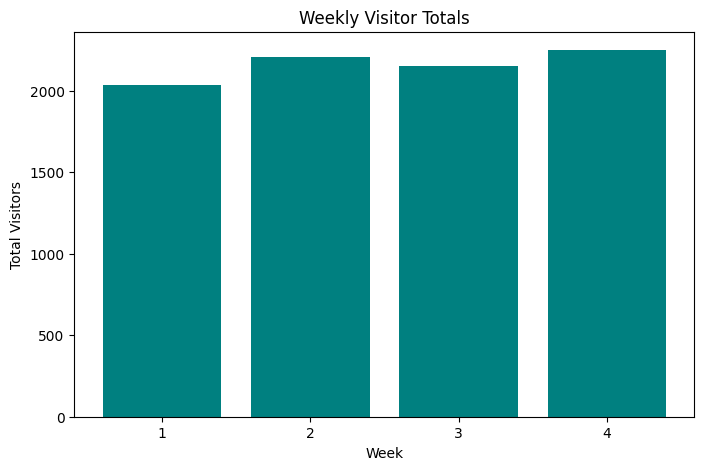

In [44]:
plt.figure(figsize=(8, 5))
plt.bar(range(1, 5), weekly_totals, color='teal')
plt.title("Weekly Visitor Totals")
plt.xlabel("Week")
plt.ylabel("Total Visitors")
plt.xticks(range(1,5))
plt.show()